In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.algorithms import bipartite
#%matplotlib inline

In [2]:
df = pd.read_csv('./archive/data.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [3]:
df["Track Name"]

0          Reggaetón Lento (Bailemos)
1                            Chantaje
2           Otra Vez (feat. J Balvin)
3                        Vente Pa' Ca
4                              Safari
                      ...            
3441192            More Than You Know
3441193                        Issues
3441194                   Tuo Fei Lun
3441195                            面具
3441196                    Let Her Go
Name: Track Name, Length: 3441197, dtype: object

In [28]:
df["Region"]
regions = []
for i in list(df["Region"]):
    if i not in regions:
        regions.append(i)

In [5]:
G = nx.Graph()

In [6]:
from datetime import date, datetime
import csv

Songs = {}
Songs.update({"song": 0})

SongDate = {}

def consecutiveDate(date, prevDate):
    if prevDate == None:
        return False
    
    dates = [datetime.strptime(date, "%Y-%m-%d"), datetime.strptime(prevDate, "%Y-%m-%d")]

    date_ints = set(d.toordinal() for d in dates)

    if max(date_ints) - min(date_ints) == len(date_ints) - 1: 
        return True
    
    return False
    


i = 0 
current_region = df["Region"][0]
for row in df.index:
    #print(df["Track Name"][row], df["Region"][row]

    if Songs.get(df["Track Name"][row]) != None and df["Region"][row] == current_region and consecutiveDate(df["Date"][row], SongDate.get(df["Track Name"][row])):
        #add to value
        newValue = Songs.get(df["Track Name"][row]) + 1
        Songs.update({df["Track Name"][row]: newValue})
    else:
        Songs.update({df["Track Name"][row]: 1})

    SongDate.update({df["Track Name"][row]: df["Date"][row]})

    if current_region != df["Region"][row]:
        G.add_node(current_region, bipartite = 0)
        songKeys = Songs.keys()

        for song in songKeys:
            #print(i)
            if Songs.get(song) >= 30:
                G.add_node(song, bipartite = 1)
                print(song, current_region)
                G.add_edge(song, current_region)

        current_region = df["Region"][row]
        Songs.clear()
        SongDate.clear()

    i = i + 1


#for a in SongDate.items():
    #print(a)

Reggaetón Lento (Bailemos) ec
Chantaje ec
Otra Vez (feat. J Balvin) ec
Vente Pa' Ca ec
Safari ec
La Bicicleta ec
Ay Mi Dios ec
Andas En Mi Cabeza ec
Traicionera ec
Vacaciones ec
Let Me Love You ec
Borro Cassette ec
24K Magic ec
Me Llamas (feat. Maluma) - Remix ec
Por Fin Te Encontré ec
Rockabye (feat. Sean Paul & Anne-Marie) ec
Enamorándonos ec
Te Quiero Pa´Mi ec
Diles (feat. Arcangel, Nengo Flow, Dj Luian & Mambo Kings) ec
Manicomio ec
I Feel It Coming ec
Work from Home ec
El Perdedor - The Remix ec
Trumpets ec
Me Rehúso ec
Sola (Remix) [feat. Daddy Yankee, Wisin, Farruko, Zion & Lennox] ec
Que Raro ec
Just Hold On ec
Photograph ec
Thinking Out Loud ec
Bajo el agua ec
Una y otra vez ec
Caraluna ec
Vuelve ec
Caminar de Tu Mano ec
Llegaste tú (feat. Reykon) ec
Cómo Te Atreves ec
Soy Peor ec
All Night ec
Shape of You ec
How Far I'll Go - From "Moana" ec
Despacito (Featuring Daddy Yankee) ec
Sigo Extrañándote ec
El Amante ec
Lumbra ec
Si Tú La Ves ec
La Rompe Corazones ec
Al Filo de Tu Am

In [30]:
#number of node 
print(len(G))
#number of edges
print(G.size())

#connected components 
print(nx.number_connected_components(G))

#clustering
print(np.mean(list(nx.clustering(G).values())))

#path length
print(nx.average_shortest_path_length(G, weight = None))

2292
6933
1
0.0
3.715939448924885


In [7]:

degrees = [G.degree(node) for node in G]

print(degrees)

kmin = min(degrees)
kmax = max(degrees)

[170, 17, 15, 15, 8, 4, 6, 6, 9, 13, 10, 7, 5, 9, 15, 1, 6, 1, 9, 14, 3, 6, 1, 5, 1, 22, 17, 7, 10, 9, 5, 1, 1, 5, 17, 1, 4, 2, 8, 6, 47, 12, 21, 15, 14, 2, 16, 17, 3, 2, 3, 23, 3, 5, 9, 28, 4, 6, 26, 7, 49, 15, 1, 4, 16, 18, 13, 1, 8, 10, 16, 9, 21, 17, 22, 14, 26, 17, 2, 9, 12, 11, 10, 17, 17, 17, 13, 6, 5, 5, 13, 1, 6, 11, 11, 15, 13, 13, 27, 14, 9, 8, 18, 48, 17, 18, 16, 17, 10, 2, 17, 12, 15, 17, 12, 16, 18, 49, 16, 10, 20, 16, 2, 47, 17, 49, 40, 16, 42, 7, 11, 16, 49, 1, 16, 4, 4, 9, 9, 17, 14, 14, 17, 48, 13, 8, 48, 2, 21, 18, 11, 3, 2, 2, 11, 6, 17, 14, 39, 20, 3, 16, 7, 4, 14, 44, 13, 16, 14, 12, 2, 193, 3, 1, 2, 1, 1, 15, 1, 1, 1, 7, 1, 1, 8, 1, 1, 1, 1, 1, 2, 1, 1, 1, 17, 11, 1, 2, 1, 3, 4, 1, 3, 13, 2, 13, 1, 8, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 9, 5, 21, 1, 1, 1, 1, 1, 7, 34, 1, 1, 14, 9, 1, 16, 1, 1, 1, 1, 1, 1, 8, 12, 1, 1, 1, 1, 23, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 17, 8, 14, 1, 2, 12, 11, 19, 13, 35, 18, 12, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 6

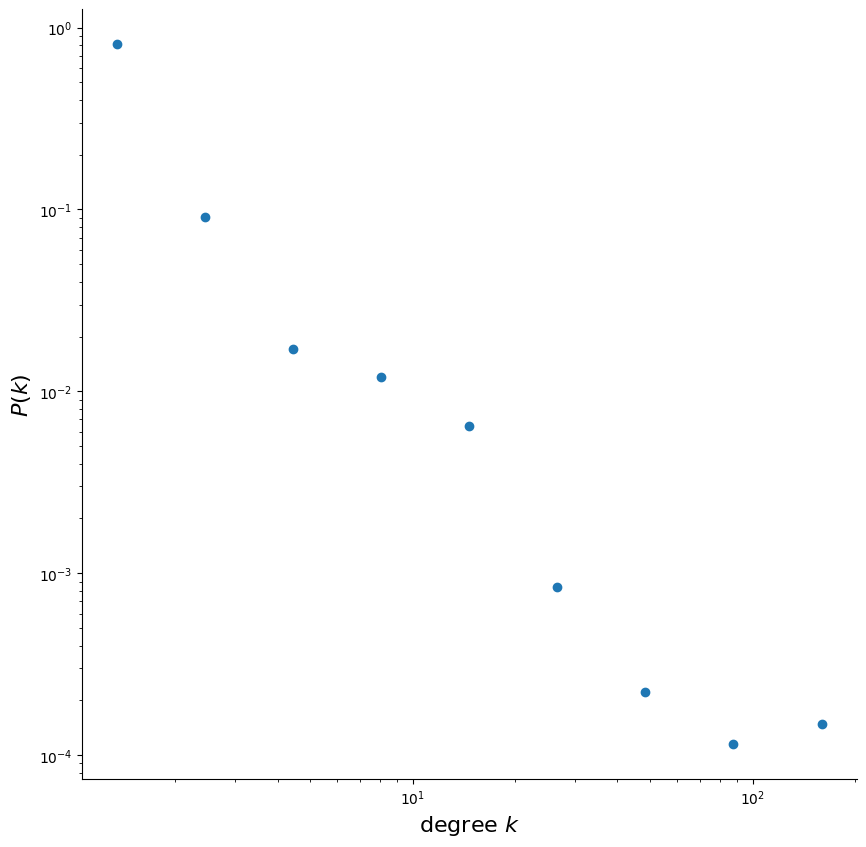

In [9]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num = 10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(10,10))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

[  1.           1.81618393   3.29852407   5.99072641  10.88026105
  19.76055529  35.88880298  65.18066727 118.38008052 215.        ]
[8.11463740e-01 9.09485956e-02 1.71784333e-02 1.19570118e-02
 6.48532825e-03 8.38609728e-04 2.23423902e-04 1.14817102e-04
 1.49015916e-04]


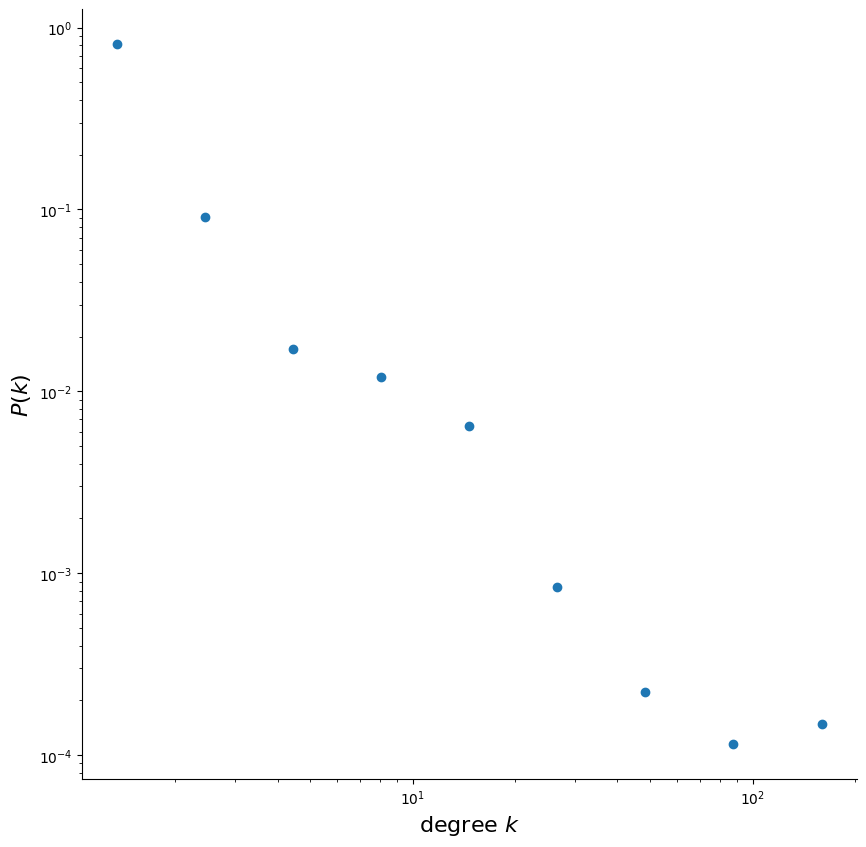

In [10]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

print(bin_edges)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

print(density)

fig = plt.figure(figsize=(10,10))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
#plt.show()

In [11]:
with open("edges.csv", "w", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(["source", "target"])

for edge in list(G.edges()):
    row = [edge[0], edge[1]]
    with open("edges.csv", "a", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(row)



In [29]:
with open("songscountries.csv", "w", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                writer.writerow(["label", "side"])


for node in list(G.nodes()):
    with open("songscountries.csv", "a", encoding ="UTF8", newline='') as o:
                writer = csv.writer(o)
                if node in regions:
                    writer.writerow([node, 1])
                else:
                    writer.writerow([node, 0])
                


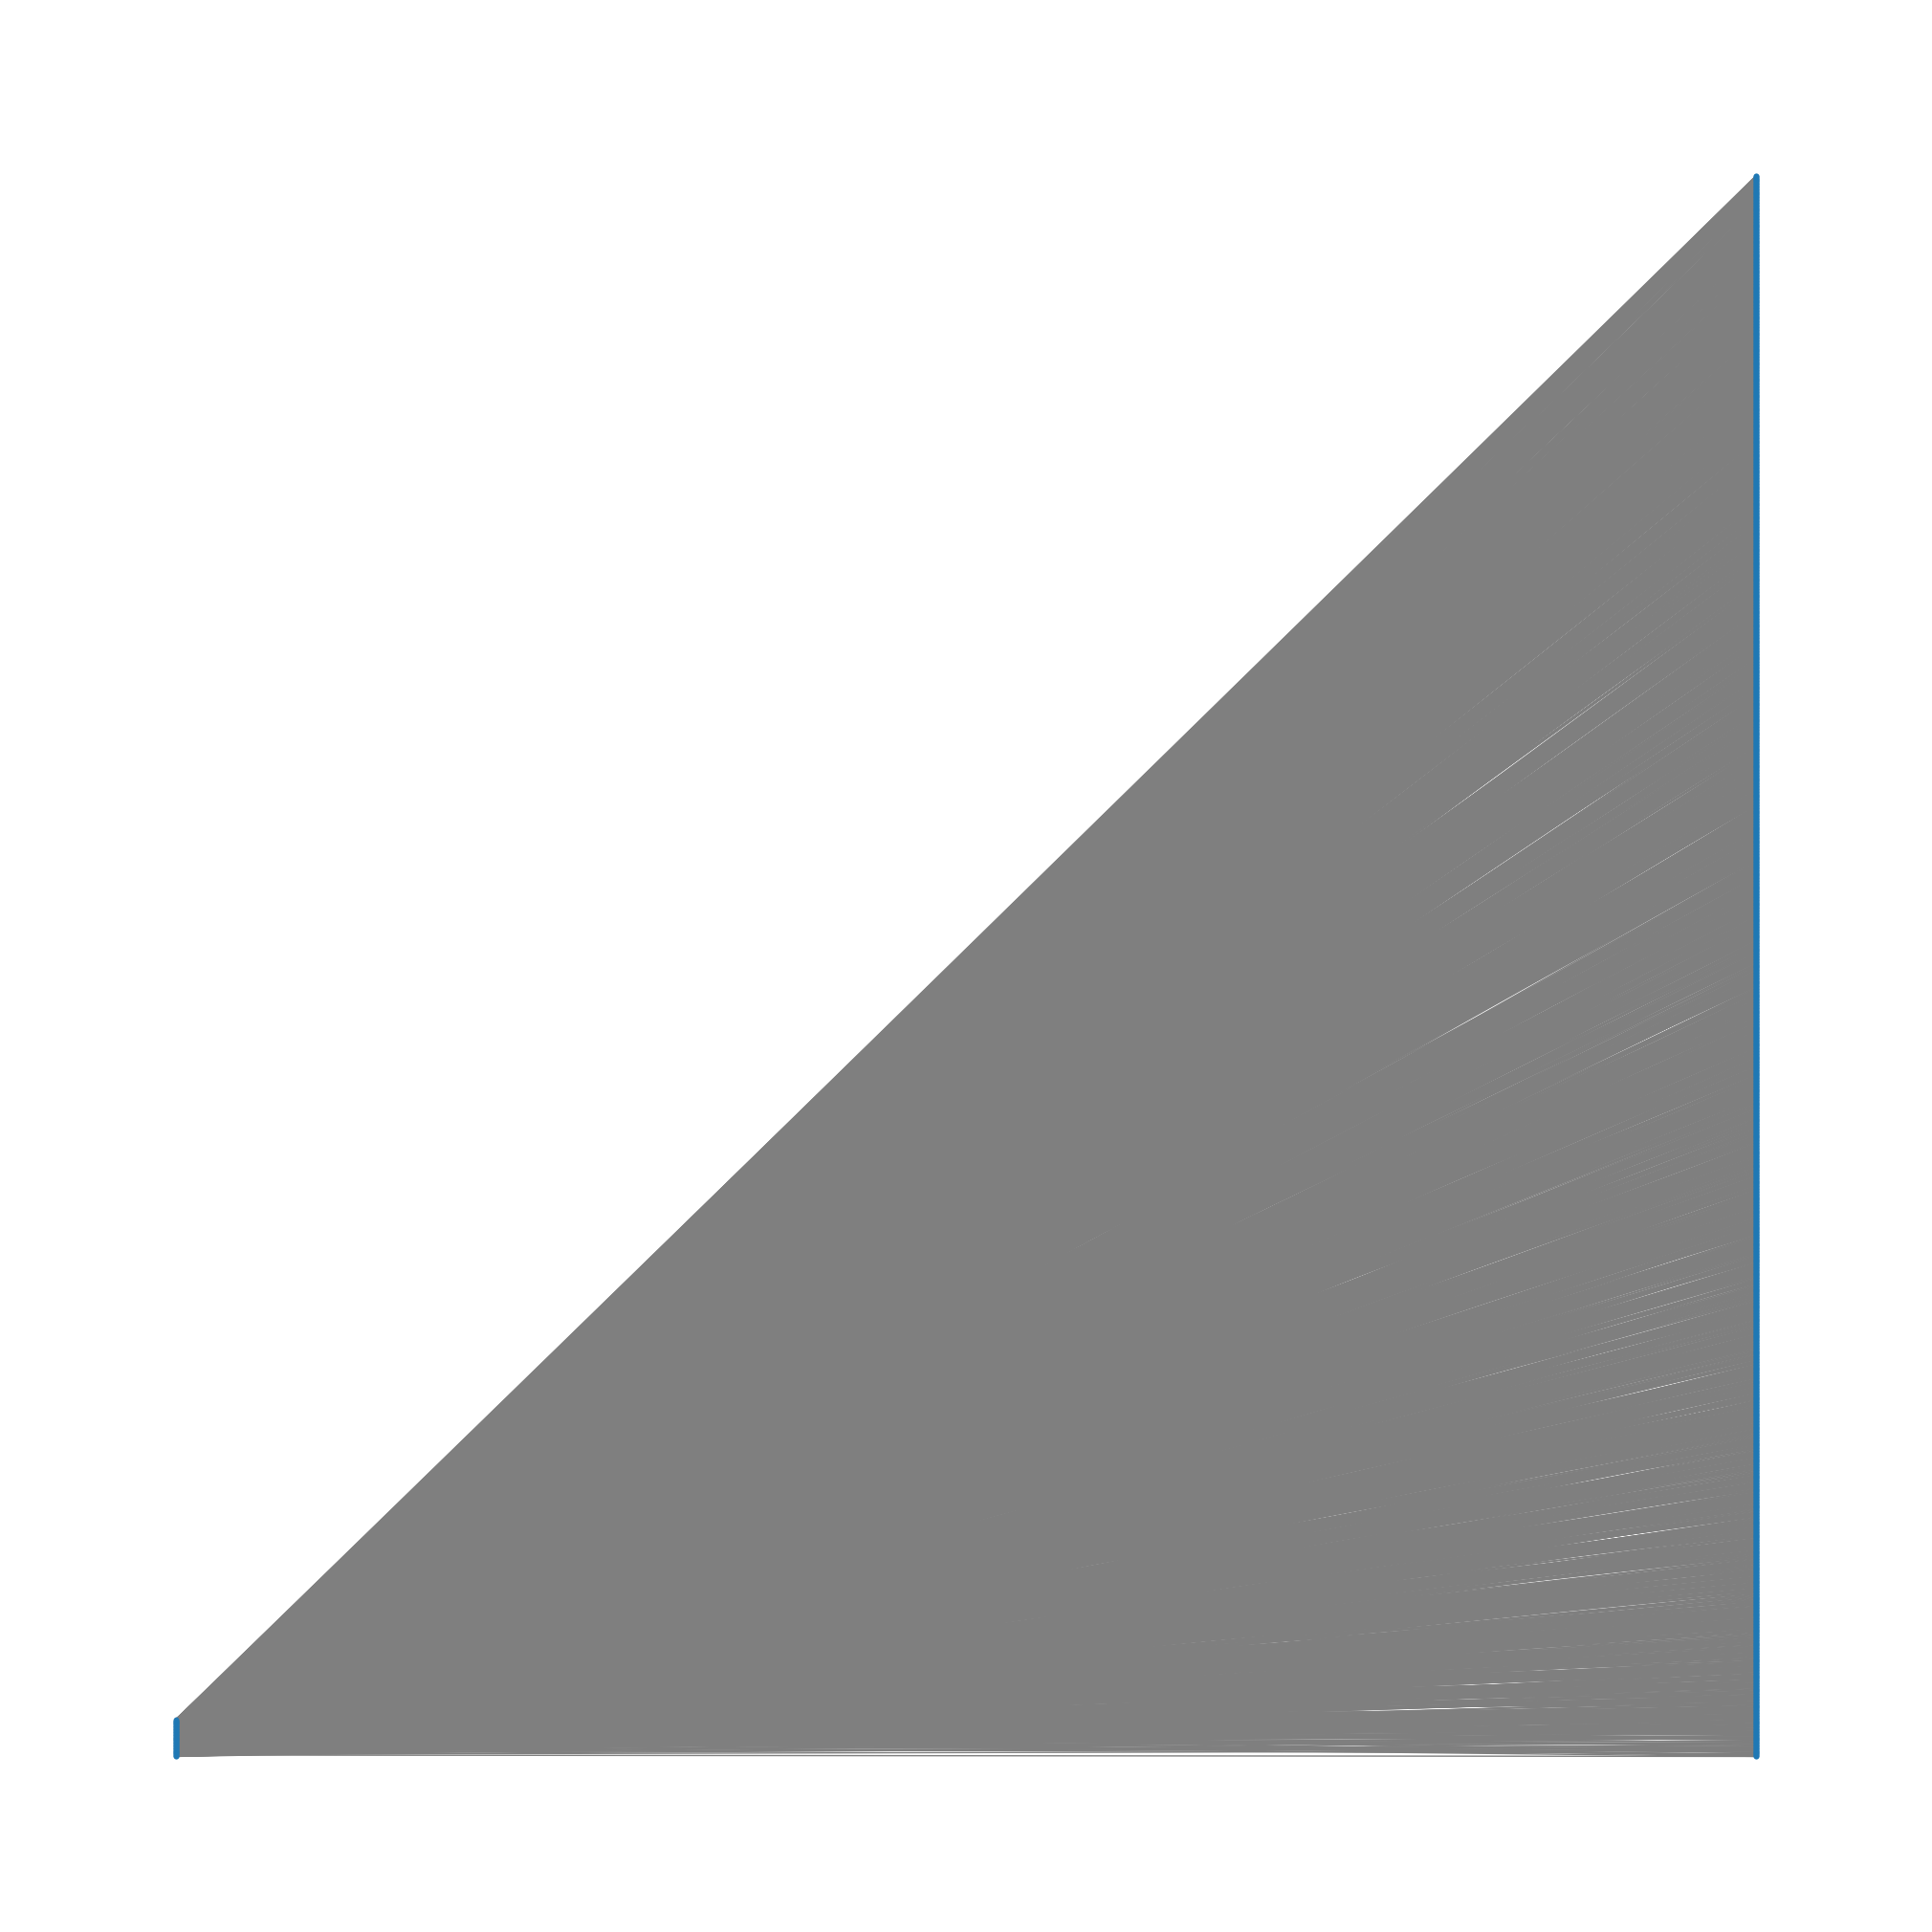

In [14]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n , (1, i)) for i, n in enumerate(X) )
pos.update( (n , (2, i)) for i, n in enumerate(Y) )

fig = plt.figure(figsize=(20,20))
nx.draw(G, pos= pos, node_size=10, edge_color = "tab:gray")